# Fourier

In [54]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('../signal.mplstyle')
mpl.rcParams['font.size'] = 16

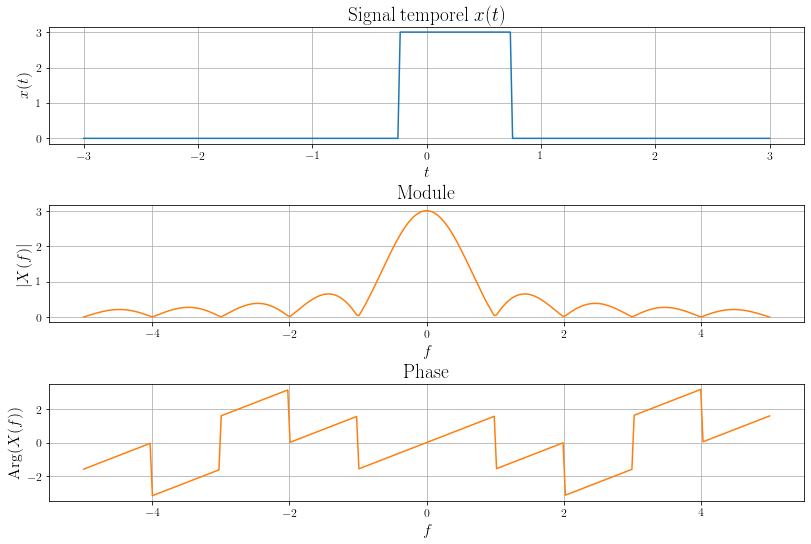

In [72]:
# Exemple de spectre 

A, T, d = 3, 1, .25

fig, axs = plt.subplots(3, 1, figsize=(12,8))
fig.tight_layout(pad=2.5)

t = np.linspace(-3*T, 3*T, 300)
x = np.where((t-d>-T/2)&(t-d<T/2), A, 0)
axs[0].plot(t,x)
axs[0].set_xlabel('$t$')
axs[0].set_ylabel('$x(t)$')
axs[0].set_title('Signal temporel $x(t)$')

f = np.linspace(-5/T, 5/T, 300)
X = A*T * np.sinc(f*T) * np.exp(1j*2*np.pi*f*d)
axs[1].plot(f, np.abs(X), 'C1')
axs[1].set_xlabel('$f$')
axs[1].set_ylabel('$|X(f)|$')
axs[1].set_title('Module')
axs[2].plot(f, np.angle(X), 'C1')
axs[2].set_xlabel('$f$')
axs[2].set_ylabel('$\mathrm{Arg}(X(f))$')
axs[2].set_title('Phase')

plt.savefig("spectre.svg")

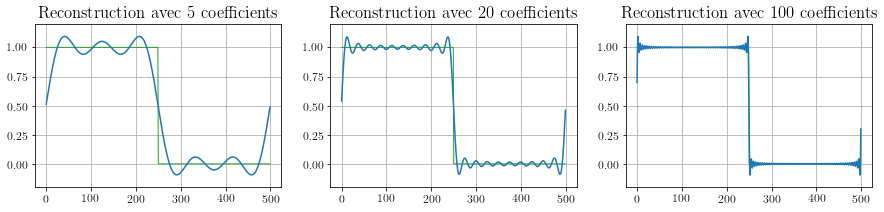

In [10]:
# Phénomène de Gibbs

N = 500
n = np.arange(N)

# Signal de base
x = np.where(n<N/2, 1, 0)

# FFT
X = np.fft.fft(x)

# Nombre de coefficients de la FFT à conserver (de -K à K)
K = [5, 20, 100]

fig = plt.figure(figsize=(15,3))
for i, k in enumerate(K):
    
    # Annulation des coefficients de la FFT
    Y = X.copy()
    Y[k+1:N-k] = 0
    
    # Reconstruction
    y = np.fft.ifft(Y)
    y = np.real(y)
    
    # Affichage
    plt.subplot(1, len(K), i+1)
    plt.plot(n, x, "-", color="tab:green", linewidth=1)
    plt.plot(n, y)
    plt.ylim([-.2, 1.2])
    plt.title(f"Reconstruction avec {k} coefficients")

plt.savefig("gibbs.svg")